#Ankush Dey
#Roll No:- MDS202108

In [ ]:
!pip install opencv-python 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### $\color{yellow}{\text{1. Download the image CinqueTerre.jpg from the class folder. Read it using OpenCV and perform the }}$
###$\color{yellow}{\text{following operations}}$

####(a) Find and store the size and number of channels of the image

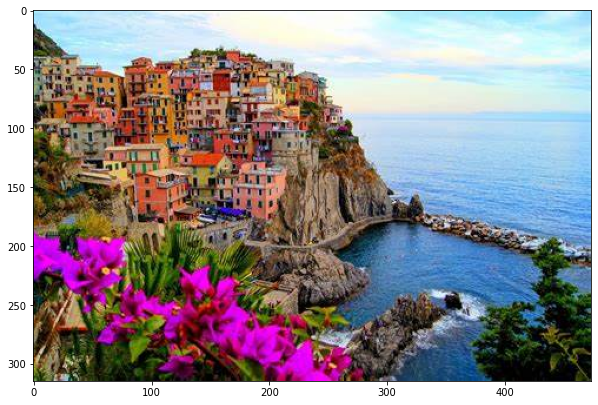

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
src=cv2.imread("/content/CinqueTerre.jpg")
image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(image)

In [ ]:
print("Dimensions of the image =",image.shape[:2])
print("\nNumber of channels in the image = ",image.shape[2])

Dimensions of the image = (315, 474)

Number of channels in the image =  3


###(b) For many computer vision and image processing tasks, you should be comfortable with accessing subregions of an image. Your task is to extract 50 × 50 image sub-regions from the top-left as well as the bottom right and store them in the variables subimg1 and subimg2 respectively. After you successfully extract subimg1 and subimg2 images, compute the SSD (Sum of Squared Differences) of the intensities between them and store in the variable SSD.

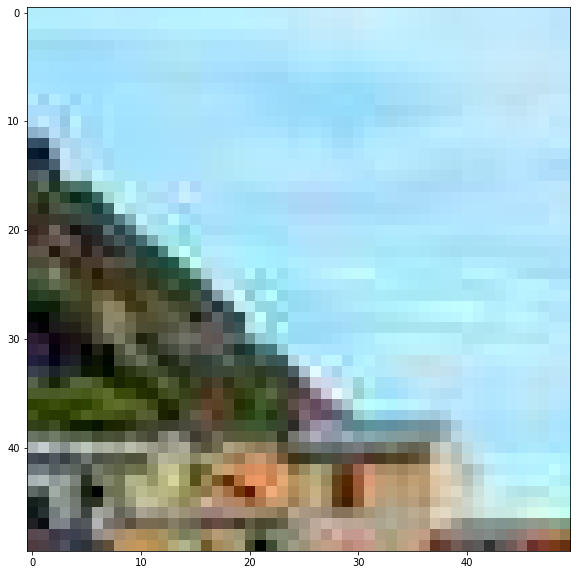

In [ ]:
subimage1 = image[0:50,0:50]
plt.figure(figsize=(10,10))
plt.imshow(subimage1)

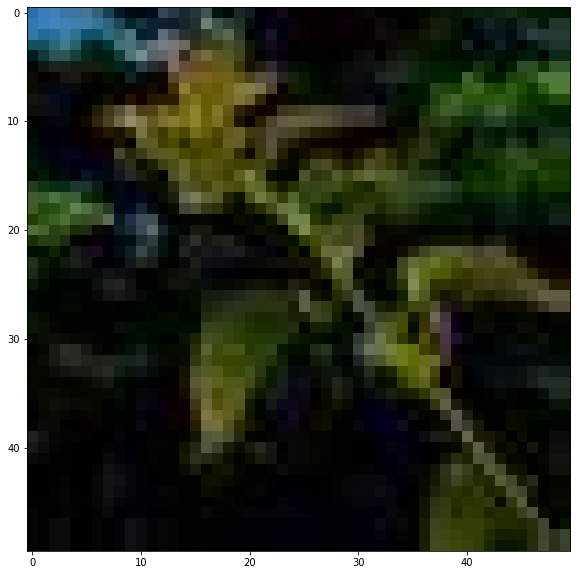

In [ ]:
subimage2 = image[265:315,424:474]
plt.figure(figsize=(10,10))
plt.imshow(subimage2)

In [ ]:
diff = subimage1[:,:,:3] - subimage2[:,:,:3]
Sum_Square_Difference = np.sum(diff*diff)
print("The Sum Squared Difference of the images is =",Sum_Square_Difference)

The Sum Squared Difference of the images is = 781484


###$\color{yellow}{\text{2. Aligning the 3 channels of the Prokudin-Gorskii Photo Collection:}}$
###$\color{yellow}{\text{For this assignment we have chosen one of his images, monastery.jpg. Download this image, split the image }}$
###$\color{yellow}{\text{ into three parts to extract the channels. The first channel is the blue channel, followed by the green channel}}$
###$\color{yellow}{\text{and the red channel. Keep the blue channel fixed and align the green and red channels to the blue channel}}$
###$\color{yellow}{\text{in the following way:}}$

####(a) To compute the best alignment between two channels, "slide" one image over the other i.e. search over a window of possible displacements say [−10; 10] pixels, score each one using an image matching metric such as SSD, and take the displacement with the best score.

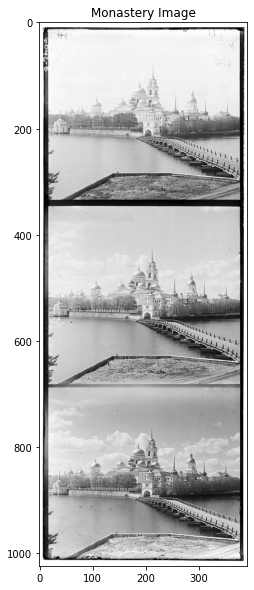

In [ ]:
image_1 = cv2.imread("/content/monastery.jpg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.title("Monastery Image")
plt.imshow(image_1, cmap = "gray")

In [ ]:
image_1.shape

(1024, 391)

In [ ]:
blue = image_1[:341,:]
green = image_1[341:682,:]
red = image_1[683:1024,:]

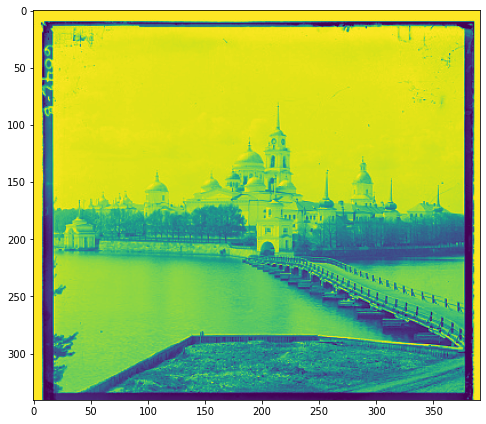

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(blue)

In [ ]:
blue.shape

(341, 391)

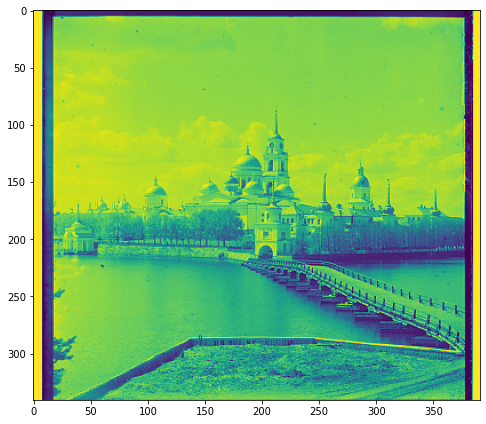

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(green)

In [ ]:
green.shape

(341, 391)

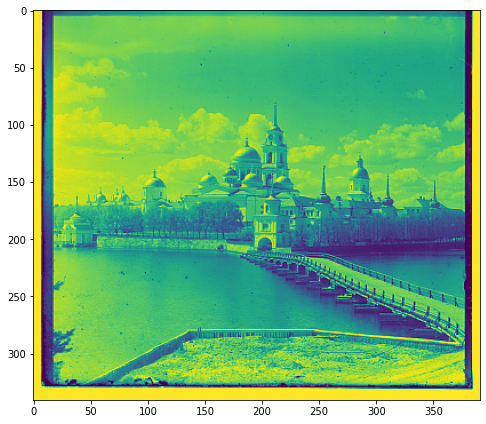

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(red)

In [ ]:
red.shape

(341, 391)

In [ ]:
def alignment(channel_1,channel_2):
    min_ssd = np.inf
    for i in range(-5,6):
        for j in range(-5,6):
            val = np.roll(np.roll(channel_2,i,axis=0),j,axis = 1)
            diff = channel_1 - val
            ssd = np.sum(diff*diff)
            if(ssd<min_ssd):
                min_ssd = ssd
                row = i
                column = j
    return(row,column,min_ssd)

####(b) What is your best SSD value and displacement vector for each channel?

In [ ]:
print(alignment(blue,green))
print("\nThe best SSD value for blue channel is = ",alignment(blue,green)[2])

(-3, 1, 13236911)

The best SSD value for blue channel is =  13236911


In [ ]:
print(alignment(blue,red))
print("\nThe best SSD value for red channel is = ",alignment(blue,red)[2])

(5, 1, 13922756)

The best SSD value for red channel is =  13922756


####(c) Once you find the best alignment between the channels, merge the 3 channels to get a coloured image.

In [ ]:
row_g = alignment(blue,green)[0]
column_g = alignment(blue,green)[1]
row_r = alignment(blue,red)[0]
column_r = alignment(blue,red)[1]

In [ ]:
new_green = np.roll(np.roll(green,row_g ,axis=0),column_g,axis = 1)
new_red = np.roll(np.roll(red,row_r ,axis=0),column_r,axis = 1)

In [ ]:
merged = cv2.merge((new_red,new_green,blue))

In [ ]:
merged.shape

(341, 391, 3)

####(d) Display the coloured image.

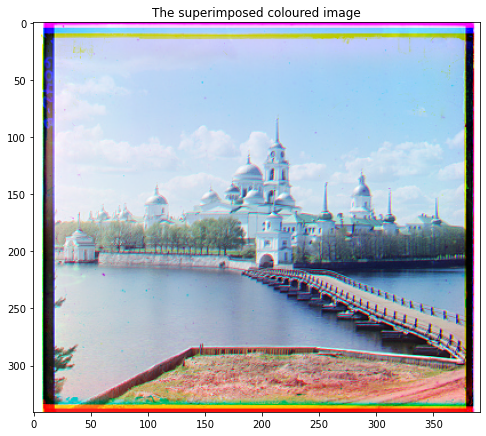

In [ ]:
plt.figure(figsize=(8,8))
plt.title("The superimposed coloured image")
plt.imshow(merged)

###$\color{yellow}{\text{3. Prove geometrically that the projections of two parallel lines lying in some plane Φ appear to converge}}$
###$\color{yellow}{\text{on a horizon line h formed by the intersection of the image plane Π with the plane parallel to Φ and passing }}$
###$\color{yellow}{\text{through the pinhole.}}$

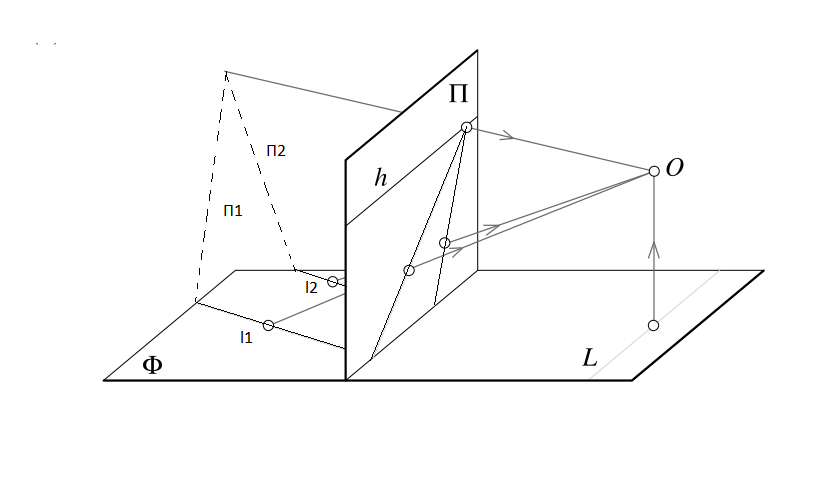

Let us consider two parallel lines $l_{1}$ and $l_{2}$ lying in the plane $Φ$ and define $l_{0}$ as the line passing through the pinhole that is parallel to $l_{1}$ and $l_{2}$.The line $l_{0}$ and $l_{1}$ define a plane $Π_{1}$. The line $l_{0}$ and $l_{2}$ define a second plane $Π_{2}$. Clearly $l_{1}$ and $l_{2}$ project onto the $δ_{1}$ and $δ_{2}$ where $Π_{1}$ and $Π_{2}$ intersect the image plane $Π$. This is the vanishing point associated with the family of lines parallel to $l_{0}$. and the projection of any lines parallel in the family appears to converge on it.

Let us consider two other parallel lines $l_{1}'$ and $l_{2}'$ in $Φ$ and define as before the corresponding line $l_{0}'$ and vanishing point $p_{0}'$. The lines $l_{0}$ and $l_{0}'$ line in a plane parallel to $Π$ that intersects the image plane along a line H passing through $p_{0}$ and $p_{0}'$. This is the horizon line, and any two parallel lines in $Φ$ appears to intersect on it. They appear to converge there since any image point above the horizon is associated with a ray issued from the pinhole and pointing away from $Φ$. Horizon points correspond to rays parallel to $Φ$ and points in that plane located at an infinite distance from the pinhole.

###$\color{yellow}{\text{4. Derive the perspective equation projections for a virtual image located at a distance d in front of the pinhole}}$

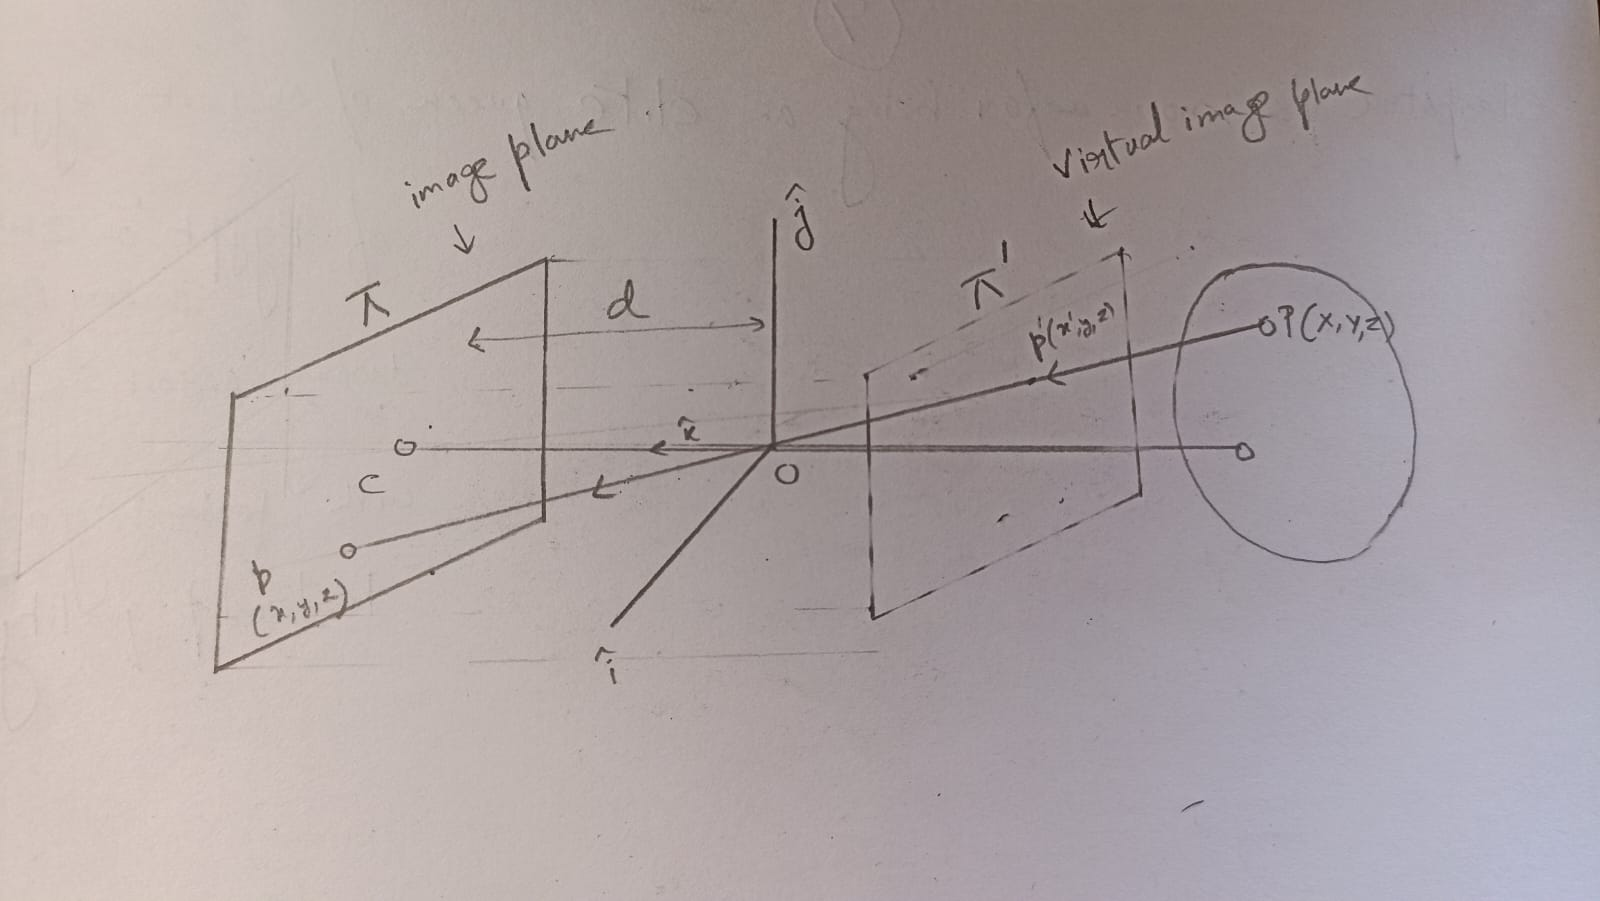

$\large{\hskip 20 em\text{Strong Perspective Projection}}$

let $\pi$ be located at a distance d from O, along the vector k. The line perpendicular to $π$ passing through O is called the optical axis & the point c where it meets $\pi$ is called the image center. 

This will act as origin for the image plane. Suppose P(X,Y,Z) is the object which is projected through the pinhole/camera to the point p(x,y,z). since z $ϵ$ image plane, so z=d (w.r.t O(i,j,k))

Now the virtual image plane is presented opposite side of the pinhole. p'(x',y',z') is the virtual image. so $x' = -x, y' = -y, z' = -z.$ 

P, O, p are collinear. so $\bar{Op} = λ\bar{OP}$ for some $λ$.

$x = \lambda X$ , $y = λY$ , $z = λZ$

$\lambda =  \dfrac{x}{X} = \dfrac{y}{Y} = \dfrac{z}{Z}$

$λ = \dfrac{x}{X} = \dfrac{y}{Y} = \dfrac{d}{Z}$,

so therefore $x = \dfrac{dX}{Z}$ , $y = \dfrac{dY}{y}$

Now $x' = -x = -\dfrac{dX}{Z}$ , $y' = -y = -\dfrac{dY}{Z}$, $z' = -d$

This is the perspective equation.

###$\color{yellow}{\text{5. List 2 of your favourite illusions and explain in short why each of them works}}$

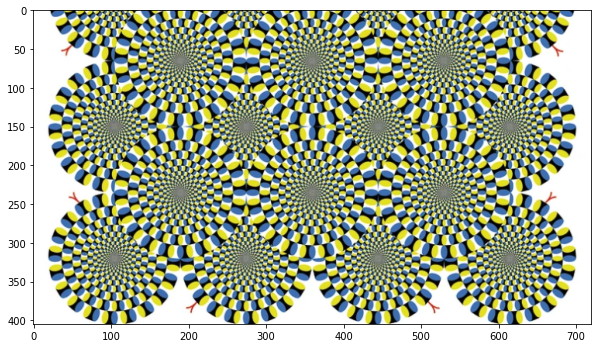

In [ ]:
path1=cv2.imread("/content/The Rotating Snakes Illusion.webp")
illusion_1 = cv2.cvtColor(path1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(illusion_1)

The "snakes" in the pattern appear to rotate as we move our eyes around the figure. In reality, nothing is moving other than our eyes! If you hold your gaze steadily on one of the "snake" centers, the motion will slow down or even stop. This illusory layout drives the responses of motion-sensitive neurons in the visual cortex, providing a neural basis for why most people (but not all) perceive motion in the image: We see the snakes rotate because our visual neurons respond as if the snakes were actually in motion.

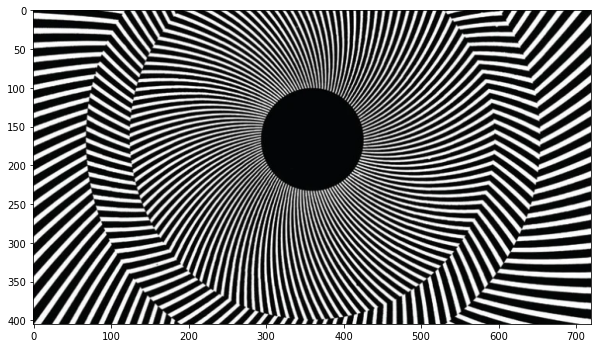

In [ ]:
path2=cv2.imread("/content/The Rotating-Tilted-Lines Illusion.webp")
illusion_2 = cv2.cvtColor(path2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(illusion_2)``

To experience the illusion, we have to move our head forward and backward as we fixate in the central area.As we approach the image, we have noticed that the radial lines appear to rotate counterclockwise.As we move away from the image, the lines appear to rotate clockwise. That illusory motion activates brain areas that are also activated by real motion. Vision scientists have shown that illusory motion activates brain areas that are also activated by real motion. This could help explain why our perception of illusory motion is qualitatively similar to our perception of real motion